<a href="https://colab.research.google.com/github/sbhosale0701/CodeClause_Project2-MaskDetection/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project-2:Mask Detection**

In [4]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade=cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model=load_model("mask_recog.h5")

def face_mask_detector(frame):
  gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  faces=faceCascade.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60,60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for(x,y,w,h) in faces:
    face_frame=frame[y:y+h,x:x+w]
    face_frame=cv2.cvtColor(face_frame,cv2.COLOR_BGR2RGB)
    face_frame=cv2.resize(face_frame,(224,224))
    face_frame=img_to_array(face_frame)
    face_frame=np.expand_dims(face_frame,axis=0)
    face_frame=preprocess_input(face_frame)
    (mask,withoutMask)=model.predict(face_frame)[0]
    label="Mask" if mask> withoutMask else "No Mask"
    color=(0,255,0) if label=="Mask" else(0,0,255)
    label="{}:{:.2f}%".format(label,max(mask,withoutMask)*100)
    cv2.putText(frame,label,(x,y-10),
                cv2.FONT_HERSHEY_SIMPLEX,1,color,2)

    cv2.rectangle(frame,(x,y),(x+w,y+h),color,3)

  return frame

1/1 [==============================] - 1s 709ms/step


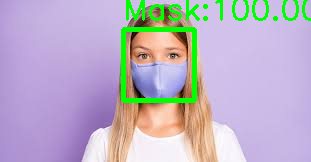

In [5]:
input_image=cv2.imread("image.jpeg")
output=face_mask_detector(input_image)
cv2_imshow(output)

1/1 [==============================] - 0s 45ms/step


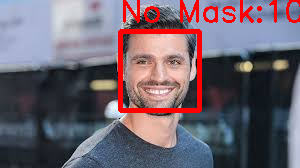

In [16]:
input_image=cv2.imread("image3.jpeg")
output=face_mask_detector(input_image)
cv2_imshow(output)

1/1 [==============================] - 0s 49ms/step


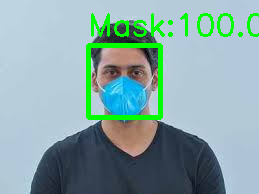

In [17]:
input_image=cv2.imread("image2.jpeg")
output=face_mask_detector(input_image)
cv2_imshow(output)

1/1 [==============================] - 0s 42ms/step


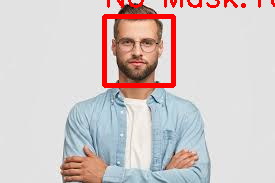

In [15]:
input_image=cv2.imread("image4.jpeg")
output=face_mask_detector(input_image)
cv2_imshow(output)